In [1]:
import pandas as pd
pd.options.display.max_columns=200
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.pipeline import make_pipeline
import bs4 as bs
import nltk
from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from wordcloud import WordCloud
from PIL import Image
from pandarallel import pandarallel

In [2]:
'''nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw')
nltk.download('punkt')'''

"nltk.download('stopwords')\nnltk.download('words')\nnltk.download('wordnet')\nnltk.download('omw')\nnltk.download('punkt')"

In [3]:
data = pd.read_csv('QueryResults.csv')

In [4]:
data.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,how do I calculate a rolling idxmax,<p>consider the <code>pd.Series</code> <code>s...,<python><pandas><numpy><dataframe><series>,40101130,9,7584,0.0,6
1,Better techniques for trimming leading zeros i...,"<p>I've been using <a href=""https://stackoverf...",<sql><sql-server><sql-server-2005><tsql><string>,662383,197,388401,0.0,19
2,"""No X11 DISPLAY variable"" - what does it mean?",<p>I am trying to install a Java application o...,<java><linux><variables><x11><headless>,662421,122,622820,0.0,12
3,Object-Oriented Callbacks for C++?,<p>Is there some library that allows me to eas...,<c++><oop><callback><pointer-to-member><eiffel>,3520133,9,10228,0.0,6
4,Why doesn't .NET find the OpenSSL.NET dll?,"<p><strong>EDIT</strong> (the whole question, ...",<c#><.net><dll><dllimport><dllnotfoundexception>,1396164,9,18554,0.0,12


In [5]:
#delete balises html with beautiful soup
def clean_html(text):
    soup = bs.BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['Body'] = data['Body'].apply(clean_html)

In [6]:
data.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,how do I calculate a rolling idxmax,consider the pd.Series s\nimport pandas as pd\...,<python><pandas><numpy><dataframe><series>,40101130,9,7584,0.0,6
1,Better techniques for trimming leading zeros i...,I've been using this for some time:\nSUBSTRING...,<sql><sql-server><sql-server-2005><tsql><string>,662383,197,388401,0.0,19
2,"""No X11 DISPLAY variable"" - what does it mean?",I am trying to install a Java application on m...,<java><linux><variables><x11><headless>,662421,122,622820,0.0,12
3,Object-Oriented Callbacks for C++?,Is there some library that allows me to easily...,<c++><oop><callback><pointer-to-member><eiffel>,3520133,9,10228,0.0,6
4,Why doesn't .NET find the OpenSSL.NET dll?,"EDIT (the whole question, it was too unclear)\...",<c#><.net><dll><dllimport><dllnotfoundexception>,1396164,9,18554,0.0,12


In [7]:
data.sample(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
29569,C++ Member Variables,Consider the following class:\nclass A\n{\n A...,<c++><class><variables><scope><member>,10198046,24,56010,0.0,6
6095,WebBrowser keyboard shortcuts,I have a WebBrowser control displaying some HT...,<c#><.net><winforms><keyboard-shortcuts><webbr...,1980515,9,8066,0.0,4
16678,What is the difference between Index Out of Ra...,"Is there any difference between ""Index was out...",<c#><.net><arrays><exception><c#-2.0>,4942190,7,4456,0.0,1
38738,why does a*b*a take longer than (a'*(a*b)')' w...,The code below performs the operation the same...,<matlab><matrix><gpu><sparse-matrix><linear-al...,50111030,16,362,0.0,3
35690,Collision detection with complex shapes,I am wanting to make a game that has each leve...,<java><image><awt><collision><java-2d>,14574045,25,10606,0.0,1


In [8]:
data = data[['Title', 'Body', 'Tags', 'Id']]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   50000 non-null  object
 1   Body    50000 non-null  object
 2   Tags    50000 non-null  object
 3   Id      50000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [10]:
data.nunique()

Title    49999
Body     50000
Tags     49190
Id       50000
dtype: int64

In [11]:
data.isna().sum()

Title    0
Body     0
Tags     0
Id       0
dtype: int64

In [12]:
data.describe(include=object)

,Title,Body,Tags
count,50000,50000,50000
unique,49999,50000,49190
top,A potentially dangerous Request.Form value was...,consider the pd.Series s\nimport pandas as pd\...,<angular><typescript><ionic-framework><ionic2>...
freq,2,1,24


In [13]:
data.Body.apply(lambda i : len(i))

0         754
1         585
2        2111
3        1307
4        1165
         ... 
49995     195
49996    2821
49997     450
49998    1179
49999    1449
Name: Body, Length: 50000, dtype: int64

<AxesSubplot: xlabel='Body', ylabel='Density'>

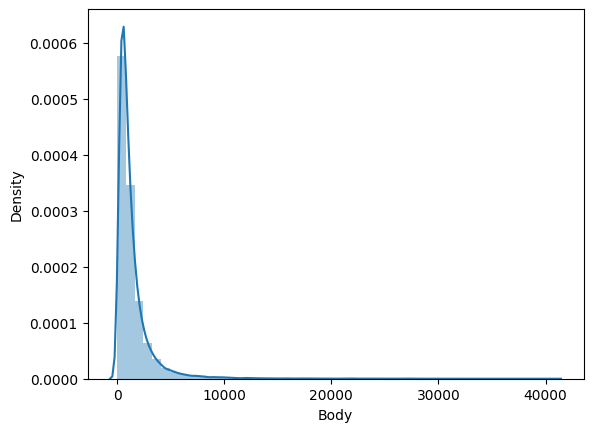

In [14]:
tmp = data.Body.str.len()
sns.distplot(tmp)

<AxesSubplot: xlabel='Title', ylabel='Density'>

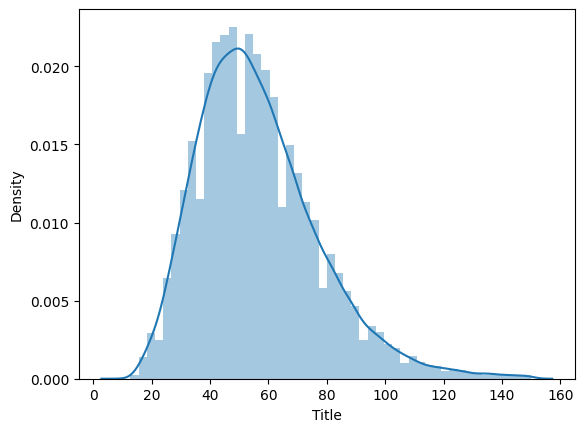

In [15]:
tmp = data.Title.str.len()
sns.distplot(tmp)

In [16]:
data.shape

(50000, 4)

In [17]:
for idx, ser in data.sample(3).iterrows():
      print(ser['Title'])
      print(ser['Body'])
      print(ser['Tags'])
      print('')
      print('----'*30)
      print('')

Binary Search in Array
How would I implement a binary search using just an array? 

<algorithm><arrays><language-agnostic><search><binary-search>

------------------------------------------------------------------------------------------------------------------------

JNI thread model?
When I call a C/C++ from Java, is a new thread created by JavaVM or JNI to run the C/C++ code while my Java thread is waiting?
I ask this because my C/C++ code runs something on the GPU and I need to check a specific buffer to get the result back. Once I have the result, I need to call my Java function again.
So I was thinking of creating a thread on the C++ side that continuously checks the buffer and once there is some data available, makes a call back to the Java side. 

<java><c++><multithreading><java-native-interface><jnienv>

------------------------------------------------------------------------------------------------------------------------

Maven release via Hudson
I'm setting up Hudson to us

In [18]:
data.set_index('Id', inplace=True)

In [19]:
data.head()

,Title,Body,Tags
Id,,,
40101130,how do I calculate a rolling idxmax,consider the pd.Series s\nimport pandas as pd\...,<python><pandas><numpy><dataframe><series>
662383,Better techniques for trimming leading zeros i...,I've been using this for some time:\nSUBSTRING...,<sql><sql-server><sql-server-2005><tsql><string>
662421,"""No X11 DISPLAY variable"" - what does it mean?",I am trying to install a Java application on m...,<java><linux><variables><x11><headless>
3520133,Object-Oriented Callbacks for C++?,Is there some library that allows me to easily...,<c++><oop><callback><pointer-to-member><eiffel>
1396164,Why doesn't .NET find the OpenSSL.NET dll?,"EDIT (the whole question, it was too unclear)\...",<c#><.net><dll><dllimport><dllnotfoundexception>


In [20]:
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')', "'", '"', '!', ';', '``', "''", '...', '’', '“', '”']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [21]:
X = data['Body'].apply(lambda i : transform_bow_lem_fct(i))

In [22]:
df = pd.DataFrame(X)
df['Title'] = data['Title'].apply(lambda i : transform_bow_lem_fct(i))
df ['Tags'] = data['Tags']

In [23]:
df.head()

,Body,Title,Tags
Id,,,
40101130,consider pd.series import panda import numpy n...,calculate rolling idxmax,<python><pandas><numpy><dataframe><series>
662383,'ve using time substring str_col patindex str_...,better technique trimming leading zero sql server,<sql><sql-server><sql-server-2005><tsql><string>
662421,trying install java application linux machine ...,x11 display variable mean,<java><linux><variables><x11><headless>
3520133,library allows easily conveniently create obje...,object oriented callback,<c++><oop><callback><pointer-to-member><eiffel>
1396164,edit whole question unclear want use openssl.n...,why n't .net find openssl.net dll,<c#><.net><dll><dllimport><dllnotfoundexception>


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 40101130 to 53180854
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    50000 non-null  object
 1   Title   50000 non-null  object
 2   Tags    50000 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


In [25]:
for idx, ser in df.sample(3).iterrows():
      print(ser['Title'])
      print(ser['Body'])
      print(ser['Tags'])
      print('')
      print('----'*30)
      print('')

unescape special character correctly url rail 3.0.3
using rail 3.0.3 ree ruby 1.8.7 gem 'mysql2 0.2.6' there search feature project enable people use get method using url using form generate url example want search origin city århus denmark destination city asunción paraguay special character url generated like someone click search button origin= c5rhus 20denmark destination=asunci f3n 20paraguay problem when search city unescaped like want tried using like cgi uri even gem when see console activerecord received query like parameter destination asunci�n paraguay origin �rhus denmark sort newest city load 0.1ms select city from city where city name '�rhus order cities.name asc city load 6.8ms select city from city where city name 'asunci�n paraguay order cities.name asc conclusion city n't found but found interesting thing when made error file asociated function output like request parameter destination asunción paraguay origin århus denmark sort newest valid one question guy idea solve

In [26]:
df.shape

(50000, 3)

In [27]:
df['text'] = df['Title'] + '    ' + df['Body']

In [28]:
df.head()

,Body,Title,Tags,text
Id,,,,
40101130,consider pd.series import panda import numpy n...,calculate rolling idxmax,<python><pandas><numpy><dataframe><series>,calculate rolling idxmax consider pd.series...
662383,'ve using time substring str_col patindex str_...,better technique trimming leading zero sql server,<sql><sql-server><sql-server-2005><tsql><string>,better technique trimming leading zero sql ser...
662421,trying install java application linux machine ...,x11 display variable mean,<java><linux><variables><x11><headless>,x11 display variable mean trying install ja...
3520133,library allows easily conveniently create obje...,object oriented callback,<c++><oop><callback><pointer-to-member><eiffel>,object oriented callback library allows eas...
1396164,edit whole question unclear want use openssl.n...,why n't .net find openssl.net dll,<c#><.net><dll><dllimport><dllnotfoundexception>,why n't .net find openssl.net dll edit whol...


In [29]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.9, min_df=2)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'Title'
cv_fit = cvect.fit(df[feat])
ctf_fit = ctf.fit(df[feat])

cv_transform = cvect.transform(df[feat])  
ctf_transform = ctf.transform(df[feat])  

In [30]:
cv_transform

<50000x10224 sparse matrix of type '<class 'numpy.int64'>'
	with 269320 stored elements in Compressed Sparse Row format>

In [31]:
df['bags_of_words'] = list(cv_transform.toarray())

In [32]:
df.head()

,Body,Title,Tags,text,bags_of_words
Id,,,,,
40101130,consider pd.series import panda import numpy n...,calculate rolling idxmax,<python><pandas><numpy><dataframe><series>,calculate rolling idxmax consider pd.series...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
662383,'ve using time substring str_col patindex str_...,better technique trimming leading zero sql server,<sql><sql-server><sql-server-2005><tsql><string>,better technique trimming leading zero sql ser...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
662421,trying install java application linux machine ...,x11 display variable mean,<java><linux><variables><x11><headless>,x11 display variable mean trying install ja...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3520133,library allows easily conveniently create obje...,object oriented callback,<c++><oop><callback><pointer-to-member><eiffel>,object oriented callback library allows eas...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1396164,edit whole question unclear want use openssl.n...,why n't .net find openssl.net dll,<c#><.net><dll><dllimport><dllnotfoundexception>,why n't .net find openssl.net dll edit whol...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [33]:
df.Title.sample()

Id
41722765    spring data mongodb sort multiple field
Name: Title, dtype: object

In [34]:
cv_fit.vocabulary_.get('python')

6988

In [35]:
#find the most common words
def get_top_n_words(corpus, n=None):
      vec = CountVectorizer().fit(corpus)
      bag_of_words = vec.transform(corpus)
      sum_words = bag_of_words.sum(axis=0) 
      words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
      words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
      return words_freq[:n]

In [36]:
#find the less common words
def get_bottom_n_words(corpus, n=None):
      vec = CountVectorizer().fit(corpus)
      bag_of_words = vec.transform(corpus)
      sum_words = bag_of_words.sum(axis=0)
      #get the words that appear less nthan n times
      words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items() if sum_words[0, idx] <= n]
      words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
      return words_freq

In [37]:
get_top_n_words(df.Title, 10)

[('how', 10144),
 ('using', 3853),
 ('file', 2573),
 ('use', 1915),
 ('error', 1854),
 ('net', 1829),
 ('what', 1793),
 ('android', 1717),
 ('python', 1595),
 ('java', 1594)]

In [38]:
df.head()

,Body,Title,Tags,text,bags_of_words
Id,,,,,
40101130,consider pd.series import panda import numpy n...,calculate rolling idxmax,<python><pandas><numpy><dataframe><series>,calculate rolling idxmax consider pd.series...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
662383,'ve using time substring str_col patindex str_...,better technique trimming leading zero sql server,<sql><sql-server><sql-server-2005><tsql><string>,better technique trimming leading zero sql ser...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
662421,trying install java application linux machine ...,x11 display variable mean,<java><linux><variables><x11><headless>,x11 display variable mean trying install ja...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3520133,library allows easily conveniently create obje...,object oriented callback,<c++><oop><callback><pointer-to-member><eiffel>,object oriented callback library allows eas...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1396164,edit whole question unclear want use openssl.n...,why n't .net find openssl.net dll,<c#><.net><dll><dllimport><dllnotfoundexception>,why n't .net find openssl.net dll edit whol...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [39]:
df['Tags'] = df['Tags'].apply(lambda i : i.split('><'))

df['Tags'] = df['Tags'].apply(lambda i : [x.replace('<', '').replace('>', '') for x in i])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 40101130 to 53180854
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Body           50000 non-null  object
 1   Title          50000 non-null  object
 2   Tags           50000 non-null  object
 3   text           50000 non-null  object
 4   bags_of_words  50000 non-null  object
dtypes: object(5)
memory usage: 2.3+ MB


In [41]:
df

,Body,Title,Tags,text,bags_of_words
Id,,,,,
40101130,consider pd.series import panda import numpy n...,calculate rolling idxmax,"[python, pandas, numpy, dataframe, series]",calculate rolling idxmax consider pd.series...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
662383,'ve using time substring str_col patindex str_...,better technique trimming leading zero sql server,"[sql, sql-server, sql-server-2005, tsql, string]",better technique trimming leading zero sql ser...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
662421,trying install java application linux machine ...,x11 display variable mean,"[java, linux, variables, x11, headless]",x11 display variable mean trying install ja...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3520133,library allows easily conveniently create obje...,object oriented callback,"[c++, oop, callback, pointer-to-member, eiffel]",object oriented callback library allows eas...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1396164,edit whole question unclear want use openssl.n...,why n't .net find openssl.net dll,"[c#, .net, dll, dllimport, dllnotfoundexception]",why n't .net find openssl.net dll edit whol...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
3915827,cil code ldftn used get function pointer addre...,get 'ldftn function pointer,"[c#, .net, clr, function-pointers, cil]",get 'ldftn function pointer cil code ldftn ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71419635,used following step integrating pip picture pi...,how add picture picture pip webrtc video call ...,"[ios, swift, webrtc, ios15, videocall]",how add picture picture pip webrtc video call ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
22050813,get warning logcat developing caused app 16699...,warning caused app implicit intent startservic...,"[android, android-intent, warnings, logcat, an...",warning caused app implicit intent startservic...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [42]:
#Multioutput classifier for tags

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

y = mlb.fit_transform(df['Tags'])

Y = pd.DataFrame(y, columns=mlb.classes_)

In [43]:
Y.shape

(50000, 18315)

In [44]:
Y.sum().sort_values()

.a                       1
method-declaration       1
method-invocation        1
method-names             1
method-swizzling         1
                      ... 
c++                   3868
python                4699
javascript            4876
java                  5846
c#                    6464
Length: 18315, dtype: int64

In [45]:
#Split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Title'], df['Tags'], test_size=0.2, random_state=42)

In [46]:
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import glob


#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim

2023-04-12 09:54:07.576243: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-12 09:54:07.690770: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 09:54:08.155376: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-12 09:54:08.470411: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.

In [47]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_titles = lemmatization(data.Title)
print (lemmatized_titles[0][0:90])

calculate rolling idxmax


In [48]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words_titles = gen_words(lemmatized_titles)

print (data_words_titles[0:5])

[['calculate', 'rolling', 'idxmax'], ['well', 'technique', 'trim', 'lead', 'zero'], ['display', 'variable', 'mean'], ['object', 'orient'], ['net', 'find']]


In [49]:
id2word = corpora.Dictionary(data_words_titles)

corpus = []
for text in data_words_titles:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 1), (1, 1), (2, 1)]
calculate


In [50]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [51]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
21    -0.496964  0.143363       1        1  8.984495
4      0.193302 -0.470242       2        1  8.316803
26     0.421581  0.246963       3        1  7.256978
18     0.286418  0.389269       4        1  5.907883
24     0.432258 -0.217249       5        1  5.534516
19    -0.010982 -0.459533       6        1  5.425256
8     -0.173400  0.441460       7        1  5.348027
12     0.447394  0.082544       8        1  4.905409
16    -0.397892 -0.246503       9        1  4.767164
0     -0.442165 -0.059204      10        1  4.466361
29    -0.320568  0.322937      11        1  4.262986
1     -0.140734 -0.392938      12        1  3.913902
3     -0.264186 -0.338313      13        1  3.875176
27     0.418325 -0.048792      14        1  3.675919
17     0.050155  0.449092      15        1  3.440808
9      0.273931 -0.192951      16        1  2.997600
11     0.191332 -0.307507      17        1  2.703242
25    -0.316845  0.125450      18        1  2.456652
28    -0.272622 -0.120606      19        1  2.302095
5      0.064032  0.311198      20        1  1.950155
2      0.175296  0.198794      21        1  1.610048
20    -0.145929  0.142855      22        1  1.456596
14    -0.079565  0.243973      23        1  1.356169
22     0.027025 -0.217113      24        1  1.222028
6      0.154045  0.044708      25        1  0.800358
23    -0.087562 -0.076893      26        1  0.462894
15     0.031747 -0.038852      27        1  0.295292
7     -0.005813  0.014696      28        1  0.102052
10    -0.005806  0.014698      29        1  0.101567
13    -0.005809  0.014697      30        1  0.101567, topic_info=            Term          Freq         Total Category  logprob  loglift
29           use  17803.000000  17803.000000  Default  30.0000  30.0000
150         file   6866.000000   6866.000000  Default  29.0000  29.0000
97         error   4924.000000   4924.000000  Default  28.0000  28.0000
75           get   5402.000000   5402.000000  Default  27.0000  27.0000
251         work   3698.000000   3698.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
24   application      0.018029   2240.541136  Topic30  -9.3948  -4.8380
25         build      0.018029   1568.207594  Topic30  -9.3948  -4.4813
26        deploy      0.018029    253.548791  Topic30  -9.3948  -2.6591
28         proxy      0.018029    171.312456  Topic30  -9.3948  -2.2671
29           use      0.018029  17803.068556  Topic30  -9.3948  -6.9107

[1310 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
32        2  0.986758  abstract
35       24  0.997553    access
88        2  0.999227       add
161      17  0.997977   android
231       3  0.997323   angular
...     ...       ...       ...
235      13  0.982551   webview
6        27  0.983296      well
82       12  0.998085    window
251       7  0.999416      work
77        7  0.997239       xml

[190 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[22, 5, 27, 19, 25, 20, 9, 13, 17, 1, 30, 2, 4, 28, 18, 10, 12, 26, 29, 6, 3, 21, 15, 23, 7, 24, 16, 8, 11, 14])

In [52]:
lemmatized_texts = lemmatization(data.Body)
print (lemmatized_texts[0][0:90])

consider import panda import numpy np.random.seed([3,1415 s list('abcdefghij s b c d e f g


In [53]:
data_words = gen_words(lemmatized_texts)
print (data_words[0][0:20])

['consider', 'import', 'panda', 'import', 'numpy', 'np', 'random', 'seed', 'list', 'abcdefghij', 'dtype', 'want', 'get', 'index', 'value', 'rolling', 'window', 'dtype', 'float', 'want']


In [54]:
get_top_n_words(lemmatized_texts, 10)

[('use', 70804),
 ('get', 34381),
 ('file', 28548),
 ('try', 28457),
 ('class', 28033),
 ('work', 27605),
 ('code', 27083),
 ('new', 26730),
 ('return', 26074),
 ('error', 25822)]

In [55]:
get_bottom_n_words(lemmatized_texts, 3)[:20]

[('plaf', 3),
 ('similarily', 3),
 ('stin', 3),
 ('newenrolment', 3),
 ('withfont', 3),
 ('ntlmhttpfilter', 3),
 ('corp', 3),
 ('creatememberpresenter', 3),
 ('icreatememberview', 3),
 ('dateadd', 3),
 ('f16f', 3),
 ('11cf', 3),
 ('88cb', 3),
 ('001111000030', 3),
 ('methodimplattribute', 3),
 ('visualsvn', 3),
 ('watin', 3),
 ('id_order', 3),
 ('cu', 3),
 ('barrier_tol', 3)]

In [56]:
pd.DataFrame(data_words).value_counts()

0    1        2    3       4    5      6          7           8      9       10       11  12      13       14      15     16   17       18   19   20     21       22     23       24      25      26   27          28       29        30       31     32        33        34      35   36  37    38          39       40      41      42     43   44      45        46   47       48      49   50      51   52    53      54   55  56      57   58  59  60     61    62  63     64      65   66  67        68    69    70          71    72    73    74   75    76   77   78    79     80      81      82          83    84    85    86        87       88         89   90      91    92     93      94        95        96    97    98          99       100     101  102     103      104   105        106  107        108  109    110       111     112             113  114     115     116    117   118    119  120       121   122   123    124  125  126  127     128  129  130     131       132   133   134         135   136  

In [57]:
def delete_top_n_words(texts, n):
    top_words = get_top_n_words(texts, n)
    for i in range(len(texts)):
        for word in top_words:
            texts[i] = texts[i].replace(word[0], "")
    return (texts)

lemmatized_texts_del = delete_top_n_words(lemmatized_texts, 30)

In [58]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 1), (1, 1), (2, 1), (3, 4), (4, 2), (5, 1), (6, 2), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 3)]
abcdefghij


In [59]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [60]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.477325 -0.227900       1        1  18.665130
27     0.117986 -0.400172       2        1  14.538685
23    -0.504399 -0.021216       3        1   6.688505
16     0.404412 -0.309461       4        1   6.601021
20     0.469508 -0.161795       5        1   5.598151
8      0.503649  0.005243       6        1   4.332766
24     0.462766  0.231868       7        1   3.540845
4      0.185542 -0.482700       8        1   3.209719
21    -0.334387 -0.329475       9        1   3.142434
7     -0.225598 -0.450835      10        1   3.088858
14    -0.327834  0.014130      11        1   2.996218
15    -0.468386  0.175458      12        1   2.659979
3     -0.084196 -0.093744      13        1   2.445819
22    -0.109459 -0.333900      14        1   2.311024
9      0.051951  0.500614      15        1   1.890806
6     -0.147717  0.270013      16        1   1.670483
1     -0.351006  0.344562      17        1   1.601399
2     -0.290786 -0.149806      18        1   1.599475
13    -0.031184 -0.465030      19        1   1.531069
28     0.259013 -0.284579      20        1   1.248547
29     0.127419 -0.122037      21        1   1.222790
25     0.188047  0.423258      22        1   1.220625
18    -0.289559  0.182540      23        1   1.156585
0      0.024125  0.193996      24        1   1.134138
26    -0.194744  0.437507      25        1   1.132690
11    -0.040207  0.410613      26        1   1.105762
10     0.176028  0.046261      27        1   1.064480
12     0.352849  0.037491      28        1   1.010211
19     0.260475  0.214411      29        1   0.816707
17     0.293018  0.344688      30        1   0.775079, topic_info=          Term          Freq         Total Category  logprob  loglift
47         use  95011.000000  95011.000000  Default  30.0000  30.0000
100       file  37734.000000  37734.000000  Default  29.0000  29.0000
238     return  34220.000000  34220.000000  Default  28.0000  28.0000
91       class  34686.000000  34686.000000  Default  27.0000  27.0000
366       name  27948.000000  27948.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
9         none      0.035963   3944.416115  Topic30 -13.7378  -6.7454
10          np      0.035963    859.320036  Topic30 -13.7378  -5.2215
11       numpy      0.035963   1014.850517  Topic30 -13.7378  -5.3878
12      object      0.035963  17142.243126  Topic30 -13.7378  -8.2146
13   obviously      0.035963   1059.540735  Topic30 -13.7378  -5.4309

[1098 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
576       1  0.999810         able
695       1  0.999682        above
379       6  0.998795     abstract
1244     20  0.992101  abstraction
343       3  0.615400       access
...     ...       ...          ...
294      24  0.123829          xml
378      17  0.996637          xxx
1063      4  0.527129         year
1063     30  0.472184         year
729      15  0.996274          zip

[978 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 28, 24, 17, 21, 9, 25, 5, 22, 8, 15, 16, 4, 23, 10, 7, 2, 3, 14, 29, 30, 26, 19, 1, 27, 12, 11, 13, 20, 18])

In [61]:
df.head()

,Body,Title,Tags,text,bags_of_words
Id,,,,,
40101130,consider pd.series import panda import numpy n...,calculate rolling idxmax,"[python, pandas, numpy, dataframe, series]",calculate rolling idxmax consider pd.series...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
662383,'ve using time substring str_col patindex str_...,better technique trimming leading zero sql server,"[sql, sql-server, sql-server-2005, tsql, string]",better technique trimming leading zero sql ser...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
662421,trying install java application linux machine ...,x11 display variable mean,"[java, linux, variables, x11, headless]",x11 display variable mean trying install ja...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3520133,library allows easily conveniently create obje...,object oriented callback,"[c++, oop, callback, pointer-to-member, eiffel]",object oriented callback library allows eas...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1396164,edit whole question unclear want use openssl.n...,why n't .net find openssl.net dll,"[c#, .net, dll, dllimport, dllnotfoundexception]",why n't .net find openssl.net dll edit whol...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [68]:
#bags of words fit on the titles
cv_fit = CountVectorizer().fit(df.Title)

#transform on text
cv_transformed = cv_fit.fit_transform(df.text)

In [69]:
lemmatized_texts = lemmatization(df.text)
print (lemmatized_texts[0][0:90])

calculate rolling idxmax consider pd.serie import panda import numpy pd.serie list abcdefg


In [70]:
data_words = gen_words(lemmatized_texts)
print (data_words[0][0:20])

['calculate', 'rolling', 'idxmax', 'consider', 'pd', 'serie', 'import', 'panda', 'import', 'numpy', 'pd', 'serie', 'list', 'abcdefghij', 'dtype', 'want', 'get', 'index', 'max', 'value']


In [65]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 4), (5, 2), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 2)]
abcdefghij


In [73]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [76]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.465490 -0.241483       1        1  23.209517
5      0.093166 -0.371851       2        1  13.181371
11    -0.514794 -0.025366       3        1   6.434414
9      0.408430 -0.297003       4        1   5.045684
28     0.425993 -0.157125       5        1   4.564556
25     0.510211 -0.002647       6        1   3.986634
7      0.463879  0.215849       7        1   3.148480
20     0.174058 -0.480671       8        1   2.774444
3     -0.328789 -0.330878       9        1   2.770988
1     -0.219048 -0.434085      10        1   2.757103
19    -0.322903  0.011421      11        1   2.513661
23    -0.458020  0.168222      12        1   2.396830
27    -0.076622 -0.075108      13        1   2.332579
2     -0.096929 -0.323501      14        1   2.016937
17     0.056211  0.490002      15        1   1.845347
22    -0.168039  0.300318      16        1   1.843177
24    -0.357519  0.319332      17        1   1.797780
13    -0.297293 -0.144924      18        1   1.668997
4     -0.032419 -0.474248      19        1   1.640001
6      0.269587 -0.323094      20        1   1.482564
26     0.135554 -0.129191      21        1   1.459308
16     0.187250  0.426510      22        1   1.430561
8     -0.253880  0.159065      23        1   1.397626
10     0.032147  0.203054      24        1   1.354752
12    -0.208833  0.440499      25        1   1.334720
21    -0.050589  0.418819      26        1   1.288568
29     0.177237  0.046898      27        1   1.152218
18     0.355822  0.043096      28        1   1.130048
0      0.270492  0.220316      29        1   1.116394
15     0.291131  0.347775      30        1   0.924737, topic_info=         Term           Freq          Total Category  logprob  loglift
117      file   48043.000000   48043.000000  Default  30.0000  30.0000
58        use  103910.000000  103910.000000  Default  29.0000  29.0000
69      error   45046.000000   45046.000000  Default  28.0000  28.0000
148    string   33820.000000   33820.000000  Default  27.0000  27.0000
119  function   33005.000000   33005.000000  Default  26.0000  26.0000
..        ...            ...            ...      ...      ...      ...
3          do       0.039021    5811.431967  Topic30 -13.9445  -7.2278
4       dtype       0.039021     362.504075  Topic30 -13.9445  -4.4533
5       float       0.039021    2876.653102  Topic30 -13.9445  -6.5246
6         get       0.039021   52973.195230  Topic30 -13.9445  -9.4378
8      import       0.039021   22613.545503  Topic30 -13.9445  -8.5865

[1102 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
598       1  0.999891        able
394       5  0.999231    abstract
354       1  0.987931      access
354       9  0.011952      access
574      28  0.997891  accomplish
...     ...       ...         ...
300       4  0.745446         xml
300      17  0.254387         xml
1125      1  0.331764        year
1125     19  0.668001        year
491       3  0.999315         yet

[1085 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 6, 12, 10, 29, 26, 8, 21, 4, 2, 20, 24, 28, 3, 18, 23, 25, 14, 5, 7, 27, 17, 9, 11, 13, 22, 30, 19, 1, 16])

In [77]:
#Coherence score for LDA model
def compute_coherence_values(model):
      coherence_model_lda = CoherenceModel(model=model, texts=data_words, dictionary=id2word, coherence='c_v')
      return coherence_model_lda.get_coherence()

coherence_values = []
for i in range(1, 30):
      lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                             id2word=id2word,
                                             num_topics=i,
                                             random_state=100,
                                             update_every=1,
                                             chunksize=100,
                                             passes=10,
                                             alpha="auto")
      coherence_values.append(compute_coherence_values(lda_model))

# Show graph
limit=30; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

KeyboardInterrupt: 

In [ ]:
# lda get topics
lda_model.get_topics()

# lda get topic words
lda_model.show_topics()

# lda get topic words
lda_model.show_topics(num_topics=30, num_words=10, log=False, formatted=True)